# Plotting

In [1]:
import pandas as pd

import numpy as np

import math

import matplotlib.pyplot as plt

data = pd.read_csv('ex2data1.txt',header = None,names = ['Exam1','Exam2','Admitted'])


data.head()

X = data.iloc[:,0:2]

X.head()

Y = data.iloc[:,2:3]

Y.head()
admitted = data['Admitted'].isin([1])
admitdata = data[admitted]
notadmitted = data['Admitted'].isin([0])
NAdata = data[notadmitted]

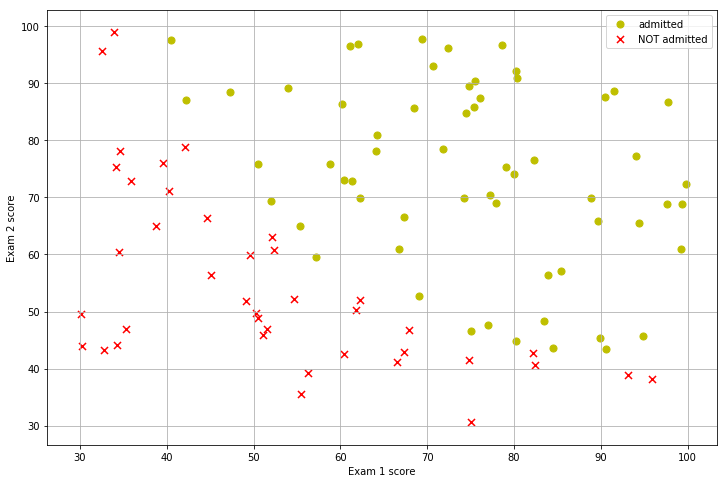

In [2]:
def plottingval():
    fig,ax = plt.subplots(figsize = (12,8))
    ax.scatter(admitdata['Exam1'],admitdata['Exam2'],s = 50,c='y',marker = 'o',label = 'admitted')
    ax.scatter(NAdata['Exam1'],NAdata['Exam2'],s = 50,c='r',marker = 'x',label = 'NOT admitted')
    ax.legend()
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    plt.grid(True)
plottingval()

# Computing cost and gradient

In [46]:
[m,n] = X.shape
r = np.ones([m,1])
x = np.append(r,X,axis = 1) #100 rows 3 column 
y = np.array(Y)#100 rows 1 column
init_theta = np.zeros([n+1,1])  #3 rows 1 column

In [48]:
from scipy.special import expit

In [57]:
def hypothesis(x,init_theta):
    z = np.dot(x,init_theta)
    sigmoid = 1/(1+math.e**(-z))
    return sigmoid

In [60]:
def computecost(init_theta,x,y,dim):
    temp1 = np.dot(y.T,np.log(hypothesis(x,init_theta)))
    temp2 = np.dot((1-y).T,np.log(hypothesis(x,init_theta)))
    return (-np.sum(temp1+temp2)/dim)
computecost(init_theta,x,y,m)
 

0.6931471805599452

In [61]:
from scipy import optimize

In [83]:
#scipy.optimize ---> alternate to fminunc function octate
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
def optimizeTheta(init_theta,myx,myy,dim):
    result = optimize.fmin(computecost, x0=init_theta, args=(myx,myy,dim), maxiter=400,full_output = True )
    print(result)
    return result[0], result[1]   

In [84]:
fin_theta,mincost = optimizeTheta(init_theta,x,y,m)

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 36
         Function evaluations: 107
(array([-0.31233333,  0.601     ,  0.48413889]), -0.0, 36, 107, 0)


In [86]:
print(computecost(fin_theta,x,y,m)) 

-0.0


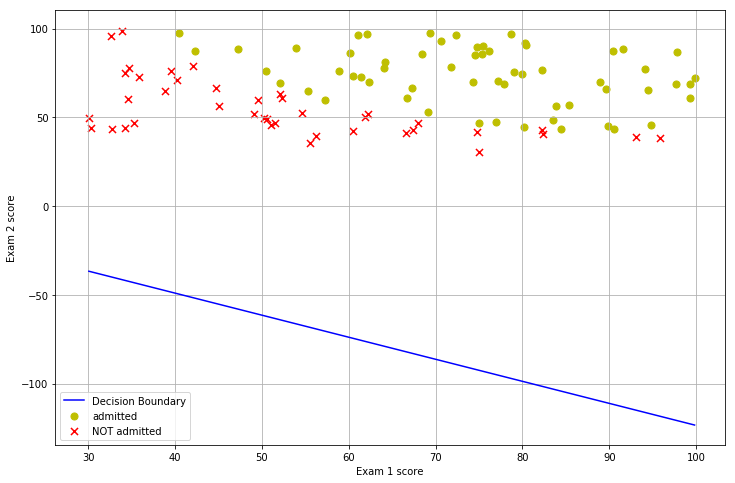

In [91]:
boundary_xs = np.array([np.min(x[:,1]), np.max(x[:,1])])
boundary_ys = (-1./fin_theta[2])*(fin_theta[0] + fin_theta[1]*boundary_xs)
plottingval()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [95]:
print (hypothesis(fin_theta,np.array([1, 45.,85.])))

1.0


In [100]:
def makePrediction(mytheta, myx):
    return hypothesis(mytheta,myx) >= 0.5

In [111]:
val1 = float(np.sum(makePrediction(fin_theta,admitdata.T)))
val0 = float(np.sum(np.invert(makePrediction(fin_theta,NAdata.T))))
length = len(admitdata)+len(NAdata)
percentage = float(pos_correct+neg_correct)/tot
print ("Fraction of training samples correctly predicted: %f." % percentage) 

Fraction of training samples correctly predicted: 0.620000.
